# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import math
# Loading all the libraries



## Load data

In [2]:
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')

# Load the data files into different DataFrames



## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
plans.sample()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

## Users

In [5]:
# Print the general/summary information about the users' DataFrame
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Print a sample of data for users
users.sample()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
494,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [7]:
users = users.fillna('missing')

In [8]:
users['user_id'].duplicated().sum()

0

### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [9]:
users['user_id'].drop_duplicates()

0      1000
1      1001
2      1002
3      1003
4      1004
       ... 
495    1495
496    1496
497    1497
498    1498
499    1499
Name: user_id, Length: 500, dtype: int64

## Calls

In [10]:
# Print the general/summary information about the calls' DataFrame
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Print a sample of data for calls
calls.sample()


,id,user_id,call_date,duration
9631,1043_90,1043,2018-11-30,15.91


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [12]:
calls['duration'] = np.ceil(calls['duration']).astype('int')#no missing data, only need to change duration datatype 

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d', errors='coerce')

## Messages

In [14]:
# Print the general/summary information about the messages' DataFrame
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Print a sample of data for messages
messages.sample()


,id,user_id,message_date
71209,1465_104,1465,2018-08-11


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

## Internet

In [16]:
# Print the general/summary information about the internet DataFrame
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [17]:
# Print a sample of data for the internet traffic
internet.sample()


,id,user_id,session_date,mb_used
101839,1488_229,1488,2018-10-19,433.77


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [18]:
# Print out the plan conditions and make sure they are clear for you
plans.head()



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [19]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


In [20]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


In [21]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [22]:
# Calculate the number of calls made by each user per month. Save the result.
calls_pivot = calls.pivot_table(index='month',
                 columns='user_id',
                 values='id',
                 aggfunc='count').fillna('')

In [23]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_pivot = calls.pivot_table(index='month',
                 columns='user_id',
                 values='duration',
                 aggfunc='sum').fillna('')


In [24]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [25]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [26]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_pivot = messages.pivot_table(index='month',
                 columns='user_id',
                 values='id',
                 aggfunc='count').fillna('')


In [27]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [28]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_pivot = internet.pivot_table(index='month',
                    columns='user_id',
                    values='mb_used',
                    aggfunc='sum').fillna('')



[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [29]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

agg_calls = calls.groupby(['user_id', 'month']).agg({'id': 'count', 'duration': 'sum'}).reset_index()
agg_messages = messages.groupby(['user_id', 'month']).agg({'message_date': 'count'}).reset_index()
agg_internet = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()



merge_df = agg_calls.merge(agg_messages, on=['user_id', 'month'], how='outer')
merge_df = merge_df.merge(agg_internet, on=['user_id', 'month'], how='outer')
merge_df = merge_df.fillna(0)

merge_df.columns = ['user_id', 'month', 'calls', 'minutes', 'messages', 'mb_used']


In [30]:
# Add the plan information
plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [31]:

plan_info = users[['user_id', 'plan']]
plan_info.columns = ['user_id', 'plan_name']

merge_df = merge_df.merge(right=plan_info, on='user_id')

merge_df = merge_df.merge(right=plans, on='plan_name')

merge_df = merge_df.sort_values(by='user_id').reset_index(drop = True)

display(merge_df.head(20))

,user_id,month,calls,minutes,messages,mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1001,11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03
2,1001,12,56.0,412.0,44.0,19369.18,surf,50,15360,500,20,10,0.03,0.03
3,1001,10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03
4,1001,8,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03
5,1001,9,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03
6,1002,12,47.0,384.0,41.0,14396.24,surf,50,15360,500,20,10,0.03,0.03
7,1002,11,55.0,386.0,32.0,19345.08,surf,50,15360,500,20,10,0.03,0.03
8,1002,10,11.0,59.0,15.0,6552.01,surf,50,15360,500,20,10,0.03,0.03
9,1003,12,149.0,1104.0,50.0,27044.14,surf,50,15360,500,20,10,0.03,0.03


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [32]:

def user_revenue(row):
    
    minutes = row['minutes']
    messages = row['messages']
   
    internet = math.ceil(row['mb_used'] / 1024) #megabyte to gigabytes 
    

    minutes_limit = row['minutes_included']
    messages_limit = row['messages_included']
   
    internet_limit = row['mb_per_month_included'] / 1024 #megabyte to gigabytes
    
    monthly_rate = row['usd_monthly_pay']
    minute_rate = row['usd_per_minute']
    message_rate = row['usd_per_message']
    internet_rate = row['usd_per_gb']
   

    minutes_revenue = 0
    messages_revenue = 0
    internet_revenue = 0
    
    #calculations for overuse and revenue 
    if minutes > minutes_limit:
        minutes_revenue = (minutes - minutes_limit) * minute_rate
    if messages > messages_limit:
        messages_revenue = (messages - messages_limit) * message_rate
    if internet > internet_limit:
        internet_revenue = (internet - internet_limit) * internet_rate
        
    revenue = monthly_rate + minutes_revenue + messages_revenue + internet_revenue
    
    return revenue

In [33]:
test = merge_df.loc[:10]
display(test.apply(user_revenue, axis = 1))

0      70.00
1      60.00
2      60.00
3      90.09
4      20.00
5      20.00
6      20.00
7      60.00
8      20.00
9     158.12
10     20.00
dtype: float64

In [34]:
merge_df['revenue'] = merge_df.apply(user_revenue, axis = 1)
display(merge_df.head(10))#add revenue to whole df

,user_id,month,calls,minutes,messages,mb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,revenue
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,70.00
1,1001,11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,60.00
2,1001,12,56.0,412.0,44.0,19369.18,surf,50,15360,500,20,10,0.03,0.03,60.00
3,1001,10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,90.09
4,1001,8,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,20.00
5,1001,9,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,20.00
6,1002,12,47.0,384.0,41.0,14396.24,surf,50,15360,500,20,10,0.03,0.03,20.00
7,1002,11,55.0,386.0,32.0,19345.08,surf,50,15360,500,20,10,0.03,0.03,60.00
8,1002,10,11.0,59.0,15.0,6552.01,surf,50,15360,500,20,10,0.03,0.03,20.00
9,1003,12,149.0,1104.0,50.0,27044.14,surf,50,15360,500,20,10,0.03,0.03,158.12


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

In [35]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.3+ MB


In [36]:
surf_data = merge_df[merge_df['plan_name'] == 'surf']
surf_data = surf_data.groupby('month')['minutes'].mean().reset_index()
surf_data.columns = ['month', 'surf_minutes']


In [37]:
ultimate_data = merge_df[merge_df['plan_name'] == 'ultimate']
ultimate_data = ultimate_data.groupby('month')['minutes'].mean().reset_index()
ultimate_data.columns = ['month', 'ultimate_minutes']


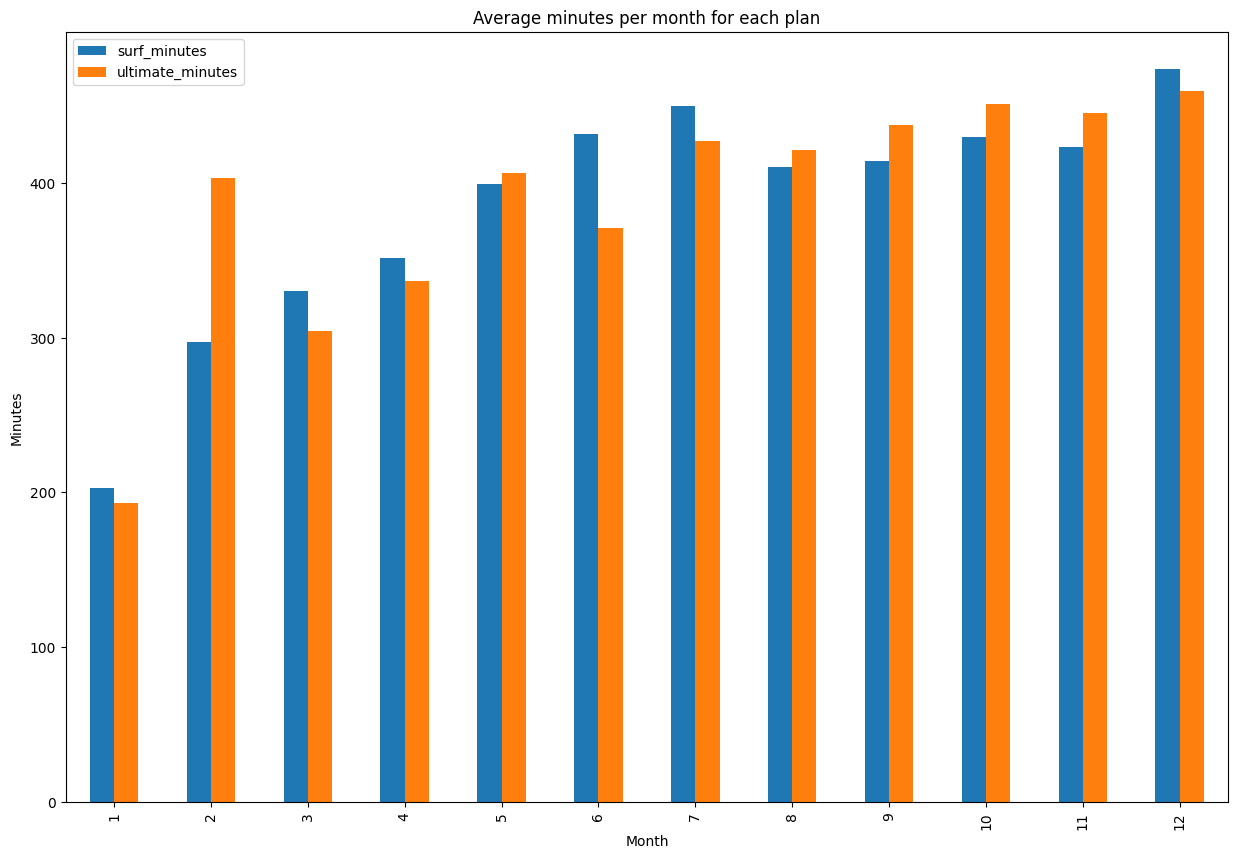

In [38]:

merged_calls = surf_data.merge(right=ultimate_data, on = 'month', how = 'outer')

merged_calls.index = pd.CategoricalIndex(merged_calls['month'], ordered=True)
merged_calls = merged_calls.sort_index()


merged_calls.plot(x = 'month', y = ['surf_minutes', 'ultimate_minutes'], kind = 'bar', figsize = (15, 10))
plt.title('Average minutes per month for each plan')
plt.xlabel('Month')
plt.ylabel('Minutes')
plt.show()

In [39]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Both plans start way below their included minutes of 500 for the surf plan and 3000 for the ultimate plan. The average minutes for the ultimate plan quickly shoot up to almost 500 minutes in February them steady back off around 450 minutes the rest of the year. The surf plan gradually increases and consistantly stays between 400 and 450 minutes after June. Overall from this data, 300 included minutes is a little overkill from the ultimate plan because both plans durations don't go over 500 minutes.

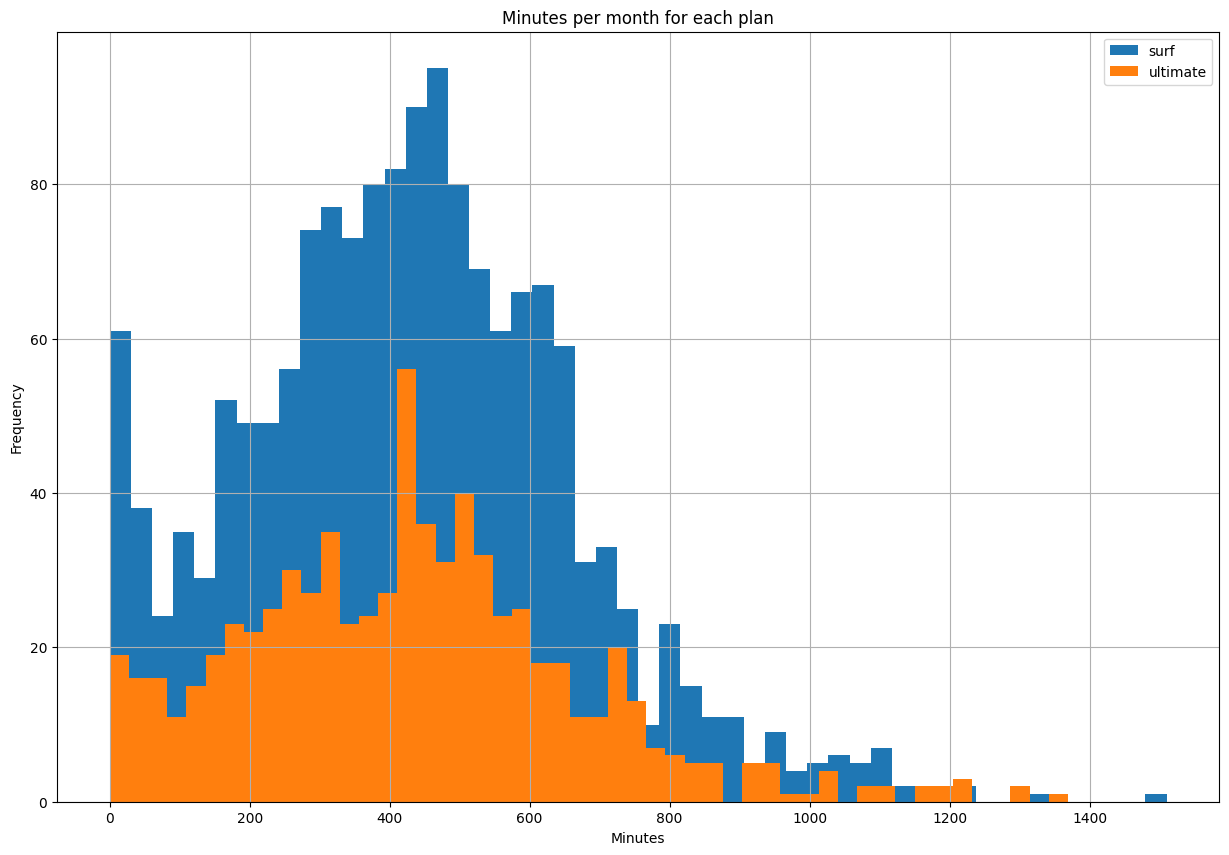

In [40]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

surf_data = merge_df[merge_df['plan_name'] == 'surf']['minutes'].hist(bins=50, figsize = (15, 10), label = 'surf')

ultimate_data = merge_df[merge_df['plan_name'] == 'ultimate']['minutes'].hist(bins=50, figsize = (15, 10), label = 'ultimate')

plt.title('Minutes per month for each plan')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The surf plan graph is much bigger with higher frequencies most likely meaning that it has more users. Other than the surf plan gragh being bigger, the graphs are very similar, the peak at the same points, and decline at the same amount of minutes. Both graphs have the highest frequency between 400 and 450 minutes.

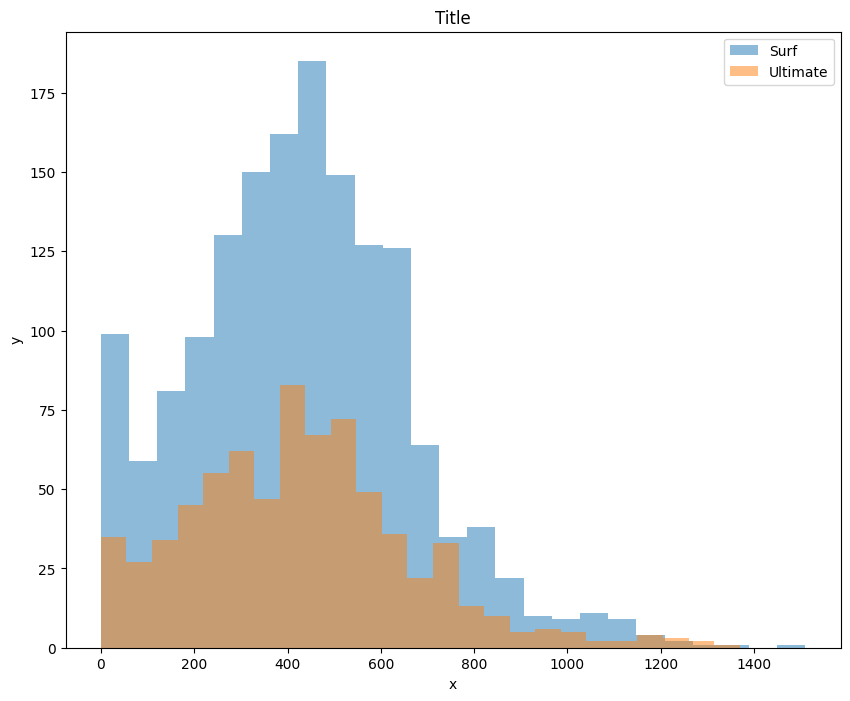

In [41]:
# Reviewer's code 2

merge_df.groupby('plan_name')['minutes'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Surf', 'Ultimate'])
plt.title('Title')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [42]:
# Calculate the mean and the variance of the monthly call duration
surf_data_calls = merge_df[merge_df['plan_name'] == 'surf'].groupby('user_id')['minutes'].mean()
ultimate_data_calls = merge_df[merge_df['plan_name'] == 'ultimate'].groupby('user_id')['minutes'].mean()

surf_mean_calls = surf_data_calls.mean()
surf_var_calls = surf_data_calls.var()
surf_std_calls = np.std(surf_data_calls)

ultimate_mean_calls = ultimate_data_calls.mean()
ultimate_var_calls = ultimate_data_calls.var()
ultimate_std_calls = np.std(ultimate_data_calls)

print(f'Mean for the surf plan: {round(surf_mean_calls,2)}')
print(f'Variance for the surf plan: {round(surf_var_calls,2)}')
print(f'Standard deviation for the surf plan: {round(surf_std_calls,2)}')
print(f'Mean for the ultimate plan: {round(ultimate_mean_calls,2)}')
print(f'Variance for the ultimate plan: {round(ultimate_var_calls,2)}')
print(f'Standard deviation for the ultimate plan: {round(ultimate_std_calls,2)}')

Mean for the surf plan: 408.74
Variance for the surf plan: 39748.06
Standard deviation for the surf plan: 199.07
Mean for the ultimate plan: 407.96
Variance for the ultimate plan: 40142.98
Standard deviation for the ultimate plan: 199.72


In [43]:
# Reviewer's code 2

merge_df.pivot_table(index='plan_name', values=['minutes'], aggfunc=['mean', 'std', 'var'])

,mean,std,var
,minutes,minutes,minutes
plan_name,,,
surf,428.749523,234.453150,54968.279461
ultimate,430.450000,240.508762,57844.464812


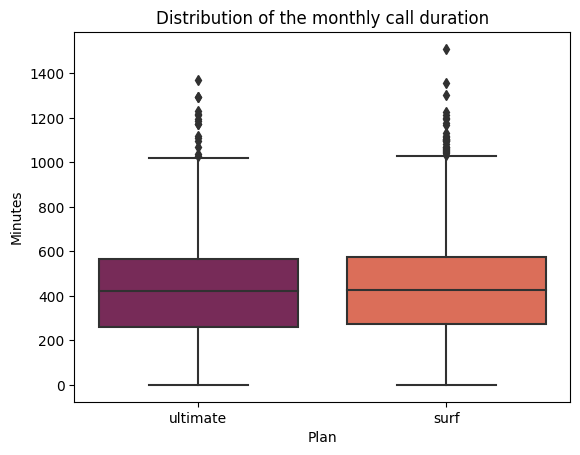

In [44]:
# Plot a boxplot to visualize the distribution of the monthly call duration
sns.boxplot(x = 'plan_name', y = 'minutes', data = merge_df, palette = 'rocket')
plt.title('Distribution of the monthly call duration')
plt.xlabel('Plan')
plt.ylabel('Minutes')
plt.show()


The box plots show that the difference in plans doesn't really effect the average monthly call duration. The means for each plans monthly call time are only about 5 minutes of each othernm , which isn'd much of a difference.

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

### Messages

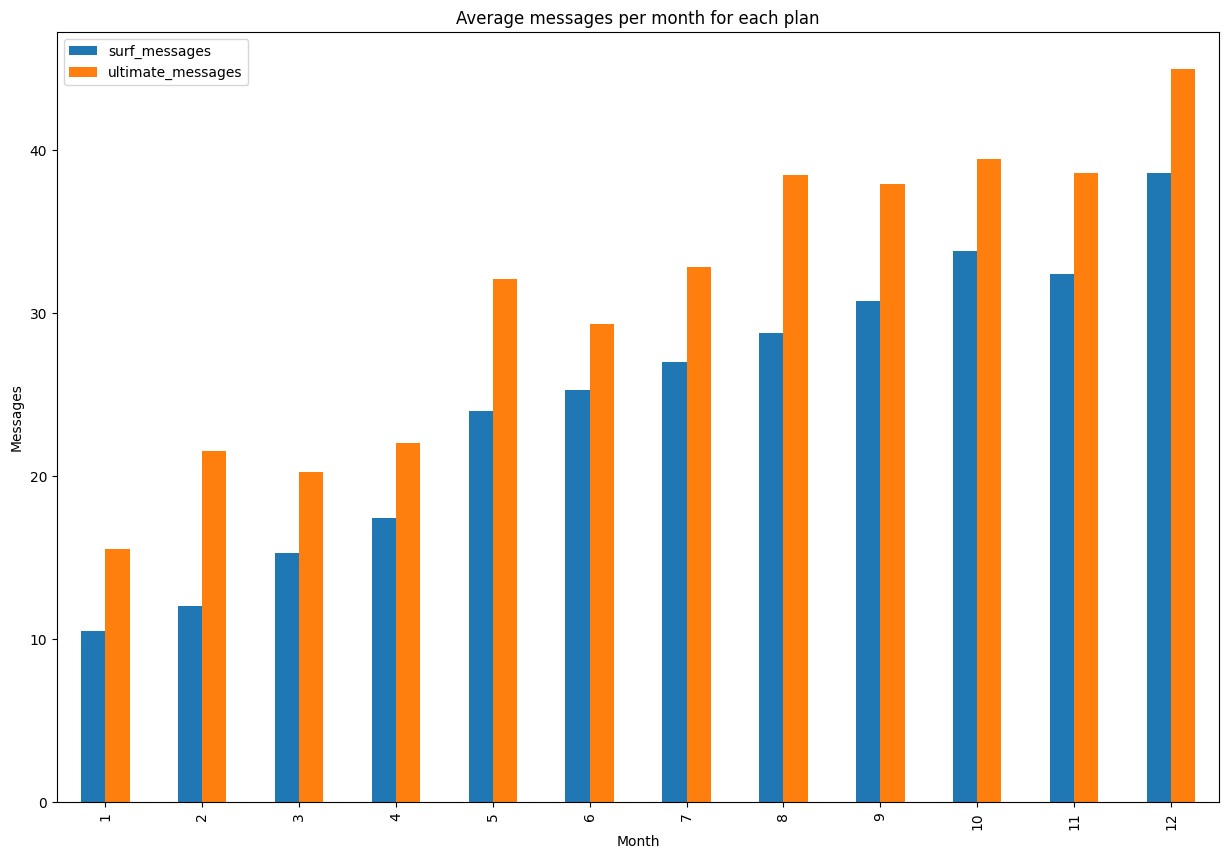

In [45]:
# Compare the number of messages users of each plan tend to send each month
 
surf_messages = round(merge_df[merge_df['plan_name'] == 'surf'].groupby('month')['messages'].mean(), 2)
ultimate_messages = round(merge_df[merge_df['plan_name'] == 'ultimate'].groupby('month')['messages'].mean(), 2)

merged_messages = surf_messages.to_frame().merge(right=ultimate_messages.to_frame(), on = 'month', how = 'outer')

merged_messages.columns = ['surf_messages', 'ultimate_messages']

merged_messages.index = pd.CategoricalIndex(merged_messages.index, ordered=True)
merged_messages.sort_index(inplace=True)


merged_messages.plot(kind = 'bar', figsize = (15, 10))
plt.title('Average messages per month for each plan')
plt.xlabel('Month')
plt.ylabel('Messages')
plt.show()


Both plans start with a low average ammount of messages each month, with the ultimate plan staying around 5 or more messages than the surf plan. They both gradually increase around with the surf plan making a more steady increase, while the ultimate plan fluctuates a bit more.

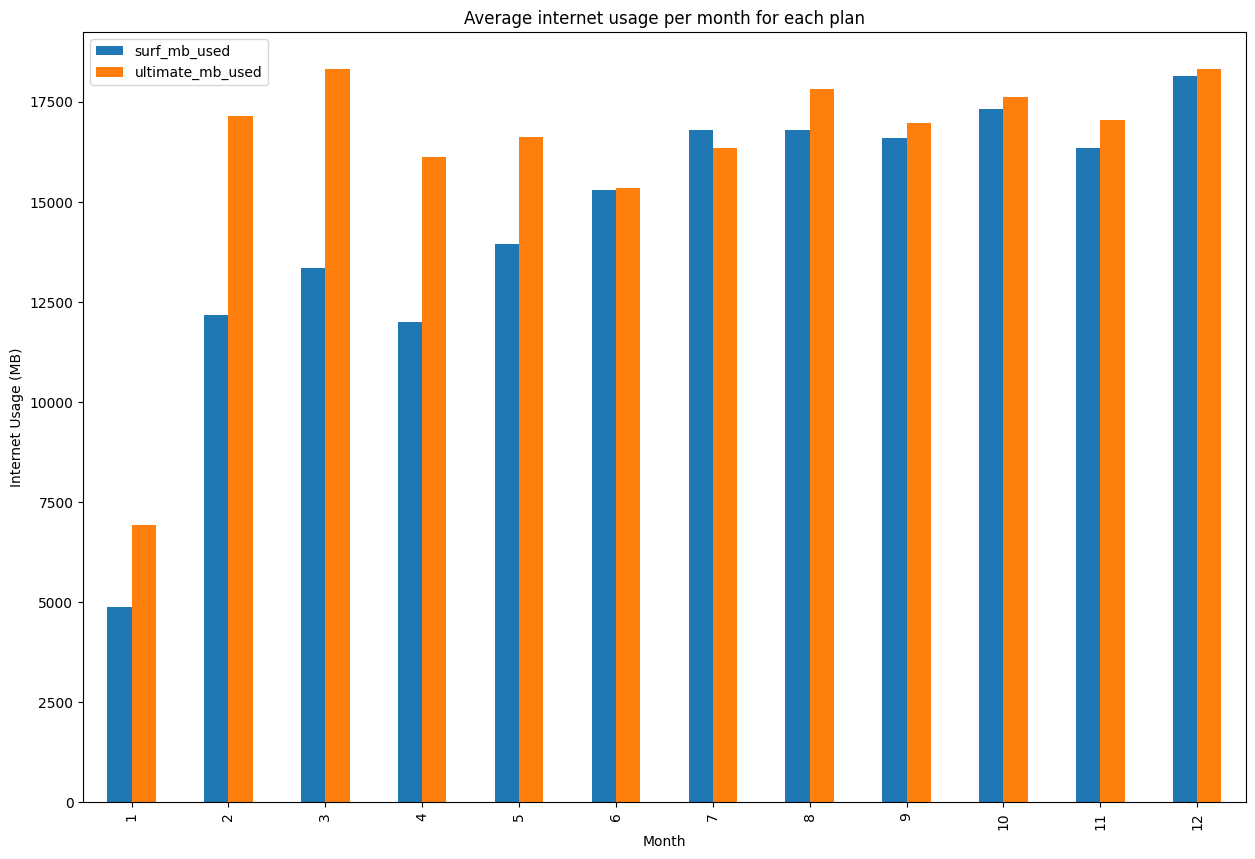

In [46]:
# Compare the amount of internet traffic consumed by users per plan
surf_data = round(merge_df[merge_df['plan_name'] == 'surf'].groupby('month')['mb_used'].mean(), 2)
ultimate_data = round(merge_df[merge_df['plan_name'] == 'ultimate'].groupby('month')['mb_used'].mean(), 2)

merged_internet = surf_data.to_frame().merge(right=ultimate_data.to_frame(), on = 'month', how = 'outer')

merged_internet.columns = ['surf_mb_used', 'ultimate_mb_used']

merged_internet.index = pd.CategoricalIndex(merged_internet.index, ordered=True)
merged_internet.sort_index(inplace=True)

merged_internet.plot(kind = 'bar', figsize = (15, 10))
plt.title('Average internet usage per month for each plan')
plt.xlabel('Month')
plt.ylabel('Internet Usage (MB)')
plt.show()


While both plans' usages start way below their included limit, the ultimate plan quickly shoots up in average usage around February and March. It almosts seems like users of the ultimate plan rememeber around that time all of the extra usage they get, but then don't really need it as much when it drops back down to around 15,500 mb. The average surf plan usage gradually increases until it reaches its limit of 15,360 mb where it stays steady at, going over a few times.

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

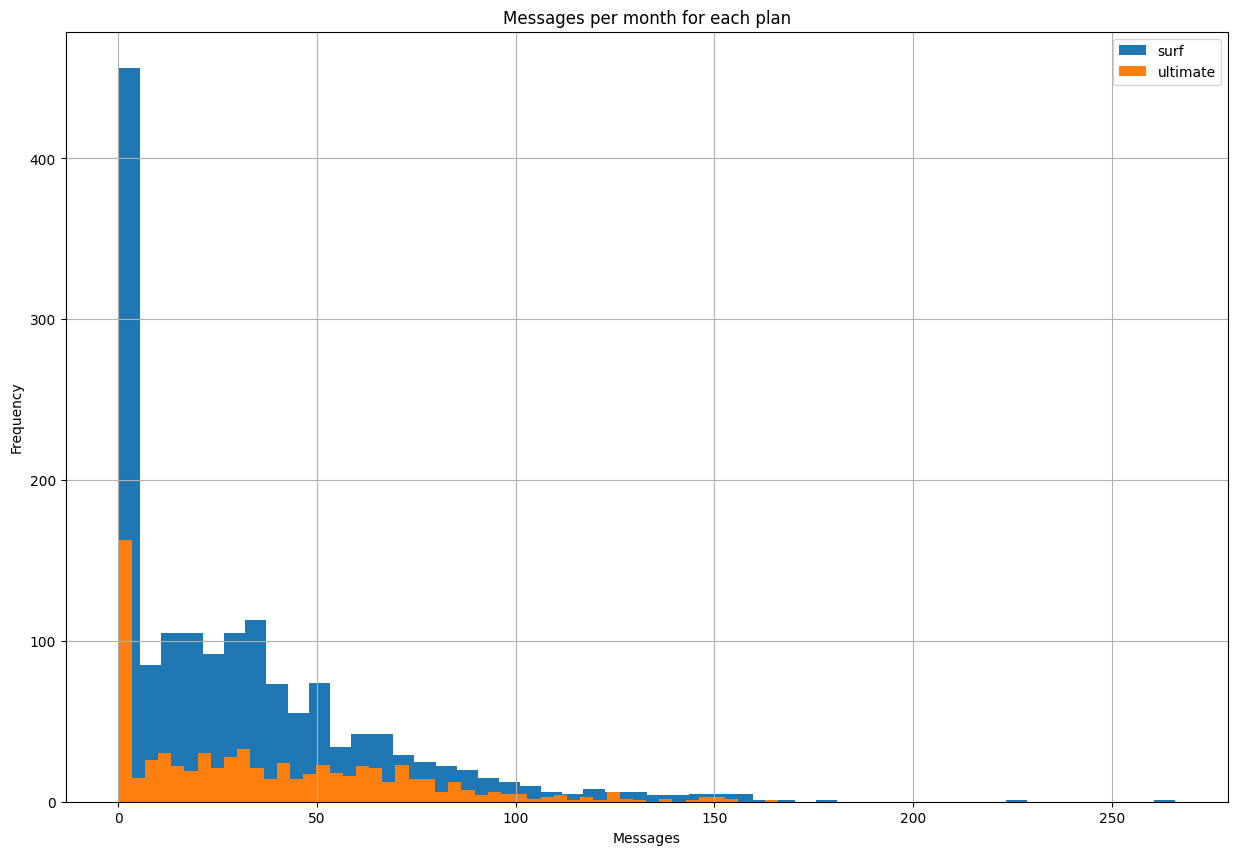

In [47]:
surf_data = merge_df[merge_df['plan_name'] == 'surf']['messages'].hist(bins=50, figsize = (15, 10), label = 'surf')
ultimate_data = merge_df[merge_df['plan_name'] == 'ultimate']['messages'].hist(bins=50, figsize = (15, 10), label = 'ultimate')

plt.title('Messages per month for each plan')
plt.xlabel('Messages')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [48]:
merge_df.pivot_table(index='plan_name', values=['messages'], aggfunc=['mean', 'std', 'var'])

,mean,std,var
,messages,messages,messages
plan_name,,,
surf,31.159568,33.566717,1126.724522
ultimate,37.551389,34.767179,1208.756744


The graphs both take similar shape, again the ultimate is smaller most likely due to the fact that there are more people who use the surf plan. The histogram shows us that the ultimate plan users are in the clear when paying extra. The max messages included monthly is 1000 and the users don't ever come close to that for either plan. The surf plan users, on the other hand, might see some issues when it comes to paying extra. Although the frrequencies for both plans hit their highest at only a couple messages a month, probably around 10, some surf plan users tend to use a lot more than their max included messages of 50.

### Internet

In [49]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


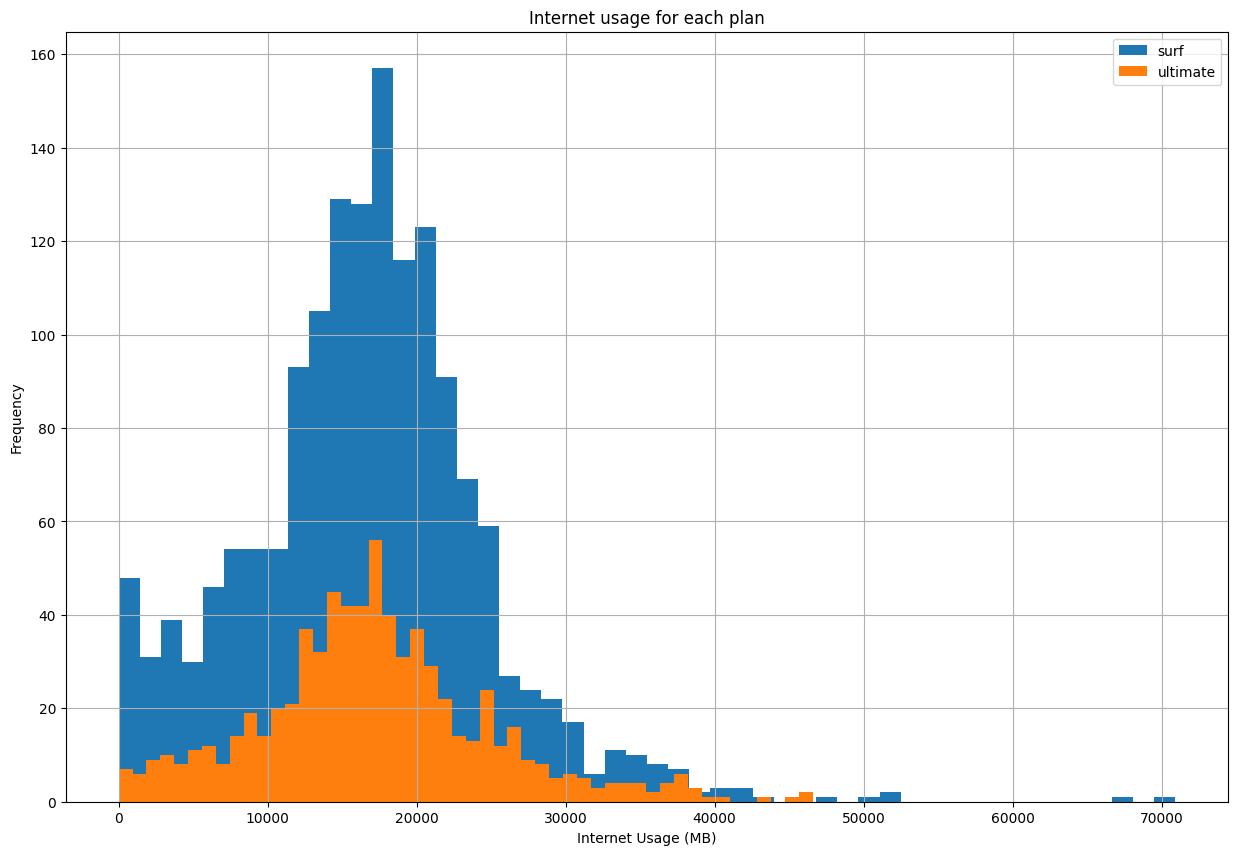

In [50]:
surf_data = merge_df[merge_df['plan_name'] == 'surf']['mb_used'].hist(bins=50, figsize = (15, 10), label = 'surf')
ultimate_data = merge_df[merge_df['plan_name'] == 'ultimate']['mb_used'].hist(bins=50, figsize = (15, 10), label = 'ultimate')

plt.title('Internet usage for each plan')
plt.xlabel('Internet Usage (MB)')
plt.ylabel('Frequency')
plt.legend()
plt.show()#internet statistics histograms for each plan

In [51]:
merge_df.pivot_table(index='plan_name', values=['mb_used'], aggfunc=['mean', 'std', 'var'])

,mean,std,var
,mb_used,mb_used,mb_used
plan_name,,,
surf,16558.283490,8013.513327,6.421640e+07
ultimate,17214.699694,7851.897435,6.165229e+07


This graph again shows that the surf plan had more users choose that plan since it's bigger. They still both mimic each other and both frequencies peak between 15000 and 20000 mb of internet usage.

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

Text(0, 0.5, 'Revenue')

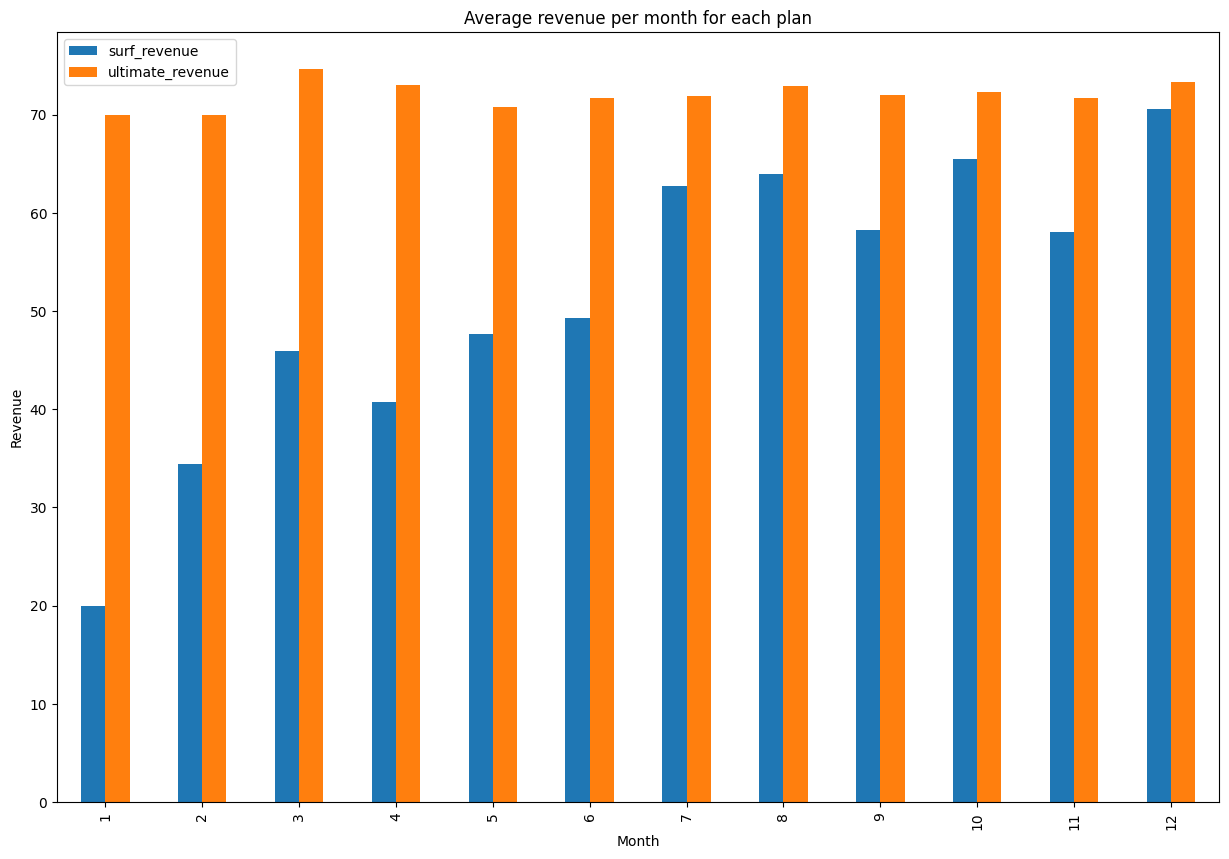

In [52]:
surf_revenue = round(merge_df[merge_df['plan_name'] == 'surf'].groupby('month')['revenue'].mean(), 2)
ultimate_revenue = round(merge_df[merge_df['plan_name'] == 'ultimate'].groupby('month')['revenue'].mean(), 2)

merged_revenue = surf_revenue.to_frame().merge(right=ultimate_revenue.to_frame(), on = 'month', how = 'outer')

merged_revenue.columns = ['surf_revenue', 'ultimate_revenue']

merged_revenue.index = pd.CategoricalIndex(merged_revenue.index, ordered=True)
merged_revenue.sort_index(inplace=True)

merged_revenue.plot(kind = 'bar', figsize = (15, 10))
plt.title('Average revenue per month for each plan')
plt.xlabel('Month')
plt.ylabel('Revenue')

The surf plan revenue gradually increases after the set montly fee of 20 dollars in January. Surf plan user often pay extra because they tend to use more than what they're offered, but still generate less revenue than the ultimate plan. The ultimate plan steadily stays around 70 dollars, it's monthly fee, jumping to almost 80 dollars once in February. Even though the users of the surf plan often pay more than their monthly fee, the ultimate plan still provides more revenue.

[Formulate conclusions about how the revenue differs between the plans.]

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [53]:
# Test the hypotheses
surf_data = merge_df[merge_df['plan_name'] == 'surf']['revenue']
ultimate_data = merge_df[merge_df['plan_name'] == 'ultimate']['revenue']

alpha = 0.05

results = st.ttest_ind(surf_data, ultimate_data, equal_var=False)

print('p-value', round(results.pvalue,7))

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value 0.0
We reject the null hypothesis


The p-value is a lot less than the significance value of 5% allowing us to reject the null hypothesis. A two tailed ttest was used to approve or disprove the hypothesis that the average revenue between plans is the same. H0 or the null hypothesis is that the average revenue of both plans is equal, which was rejected. The alternative hypothysis H1 would be more likely, in that the average revenues of each plan are not equal.

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [54]:
# Test the hypotheses
df_with_location = merge_df.merge(right=users, on='user_id')
df_NY_NJ = df_with_location.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
df_other_regions = df_with_location.query('city != "New York-Newark-Jersey City, NY-NJ MSA"')

df_NY_NJ = df_NY_NJ['revenue']
df_other_regions = df_other_regions['revenue']
alpha = 0.05

results = st.ttest_ind(df_NY_NJ, df_other_regions, equal_var=True)

print('p-value', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value 0.08460946064477204
We can't reject the null hypothesis


The pvalue was more than the significance value not allowing us to reject the null hypothesis(H0) that the average revenue from users in the NY-NJ area is equal to the average revenue from other areas. The alternative hypothesis(H1), that the average revenue from the NY-NJ area is not equal to the average revenue from the other areas, isn't incorrect, just unlikely. This means that the probability is too high that the average revenue from the NY-NJ region are equal to the rest of the the regions average revenue.

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

Although the ultimate plan provides a greater average revenue per user, the surf plan isn't very much behind. Given that the surf plan has almost double the users of the ultimate plan, and doesn't trail the ultimate plan in average revenue per user by very much, it would be smart to target a plan with a cheaper monthly pay. We were able to conclude in our analysis that we can reject that the plans generate equal revenue.